<a href="https://colab.research.google.com/github/keyurshah710/IT496/blob/main/Keyur_Titanic_Survived_dead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#data analysis
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
#read the clean & prepared datasets
titanicTrain=pd.read_csv('/content/drive/MyDrive/IT496/cleanTitanicTrain.csv')
titanicTest=pd.read_csv('/content/drive/MyDrive/IT496/cleanTitanicTest.csv')


In [4]:
#pick the predictor amog all the possibility features
predictorNames=["Pclass","Sex","Age", "SibSp", "Parch","Fare","Embarked"]



In [5]:

trainPredictors = titanicTrain[predictorNames]
#create a list with single value survived or not
targetName=['Survived']
trainTarget=titanicTrain['Survived']



In [6]:
testPredictors = titanicTest[["Pclass","Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]]


In [7]:
#create an intance of the decision tree with specific parameter
DTree=DecisionTreeClassifier(max_depth=4,criterion='entropy',splitter='random',min_samples_leaf=45)


In [8]:
#traning the decision tree instace
DTree.fit(trainPredictors,trainTarget)
#test the trained  model "unseen" data
testTarget = DTree.predict(testPredictors)

In [9]:
#the accurcy ot the model for the training data
acc_decision_tree=round(DTree.score(trainPredictors,trainTarget)* 100, 2)
print(acc_decision_tree)



80.58


In [10]:
# we need accuracy for test on data
testPIDs=titanicTest['PassengerId']
mysubmission=pd.DataFrame({'PassengerID': testPIDs, 'Survived': testTarget})
mysubmission.to_csv('/content/drive/MyDrive/IT496/MySubmission1.csv',index=False)

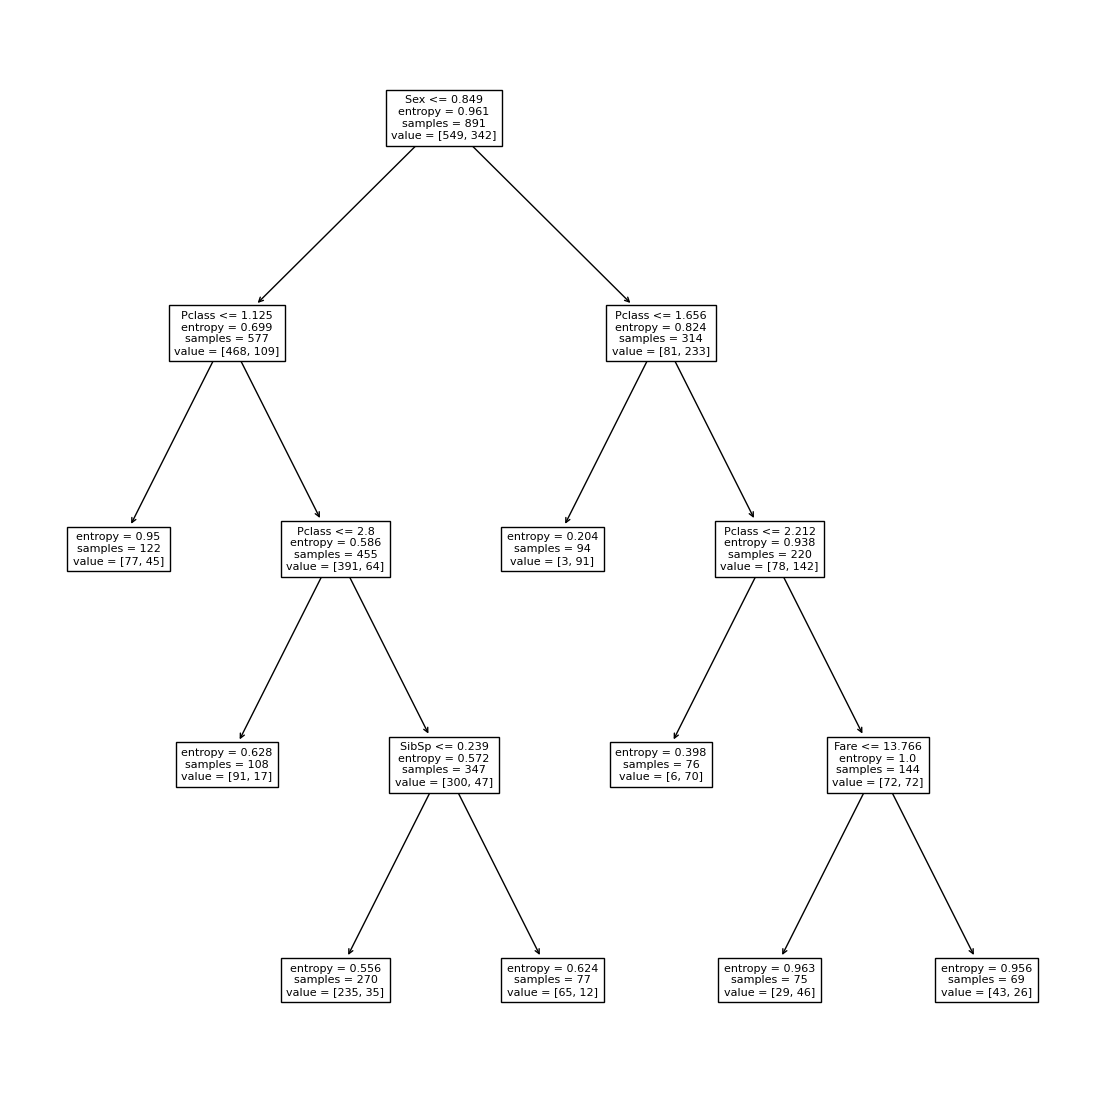

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(14,14))
tree.plot_tree(DTree, fontsize=8, feature_names=predictorNames)
plt.savefig('tree_high_dpi',dpi=500)
#male is 0 and female is 1

In [12]:
titanicTrain.describe()
print(titanicTrain['Sex'].value_counts()[0])
print(titanicTrain['Survived'].value_counts()[1])

577
342


In [42]:
import sklearn
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(trainPredictors,trainTarget)
y_pred=gnb.predict(testPredictors)
testPIDs=titanicTest['PassengerId']
mysubmission=pd.DataFrame({'PassengerID': testPIDs, 'Survived': y_pred})
mysubmission.to_csv('/content/drive/MyDrive/IT496/MySubmission1.csv',index=False)


In [40]:
print(pd.crosstab(gnb.predict(trainPredictors),trainTarget))

Survived    0    1
row_0             
0         463   99
1          86  243
